<a href="https://colab.research.google.com/github/adipurnamk/Belajar-Pengembangan-Machine-Learning/blob/master/Submission_3_TF_Lite_RPS_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install split-folders
!pip install split-folders tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-03 17:16:30--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  25.3MB/s    in 13s     

2020-10-03 17:16:43 (24.4 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

os.listdir('/tmp')

['__MACOSX', 'rockpaperscissors', 'rockpaperscissors.zip']

In [ ]:
import splitfolders

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/", seed=42, ratio=(.8, .2))

data_dir = '/tmp/rockpaperscissors/'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')

Copying files: 2188 files [00:00, 3680.43 files/s]


In [ ]:
# membuat direktori gunting, kertas dan batu pada direktori data training
train_clean_dir = os.path.join(train_dir, 'scissors')
train_messy_dir = os.path.join(train_dir, 'paper')
train_messy_dir = os.path.join(train_dir, 'rock')

# membuat direktori gunting, kertas dan batu pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'scissors')
validation_messy_dir = os.path.join(validation_dir, 'paper')
validation_messy_dir = os.path.join(validation_dir, 'rock')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size =(150,150),
        batch_size=32,
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size =(150,150),
        batch_size=32, 
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# Model merupakan klasifikasi multi kelas sehingga loss function yang digunakan bukan binary_crossentropy.
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# Menambahkan early-stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2)

In [ ]:
%%time
history = model.fit(
            train_generator,
            steps_per_epoch=25,  
            epochs=20,
            validation_data=validation_generator, 
            validation_steps=5, 
            callbacks=[es], 
            verbose=2)

Epoch 1/20
25/25 - 6s - loss: 0.9673 - accuracy: 0.5550 - val_loss: 0.6442 - val_accuracy: 0.7937
Epoch 2/20
25/25 - 6s - loss: 0.4259 - accuracy: 0.8438 - val_loss: 0.2948 - val_accuracy: 0.8875
Epoch 3/20
25/25 - 6s - loss: 0.2538 - accuracy: 0.9138 - val_loss: 0.2801 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 6s - loss: 0.2832 - accuracy: 0.9075 - val_loss: 0.1785 - val_accuracy: 0.9500
Epoch 5/20
25/25 - 6s - loss: 0.2321 - accuracy: 0.9113 - val_loss: 0.2688 - val_accuracy: 0.9062
Epoch 00005: early stopping
CPU times: user 35.9 s, sys: 995 ms, total: 36.9 s
Wall time: 38.6 s


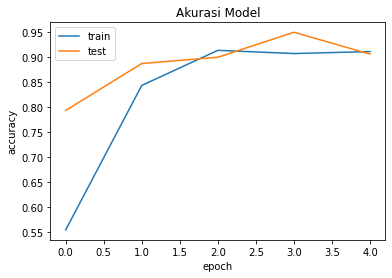

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

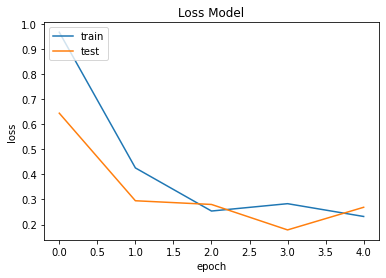

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmp_hq6uc9t/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.pb') 
%cd

INFO:tensorflow:Assets written to: my_model.pb/assets


INFO:tensorflow:Assets written to: my_model.pb/assets


/root
